<a href="https://colab.research.google.com/github/HuongNguyen2018/Machine-Learning/blob/master/Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


# Download fashion data from mnist 

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

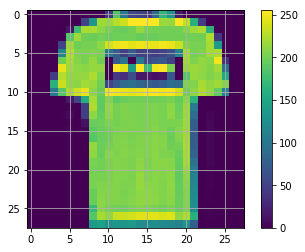

In [6]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(True)
plt.show()

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way:

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

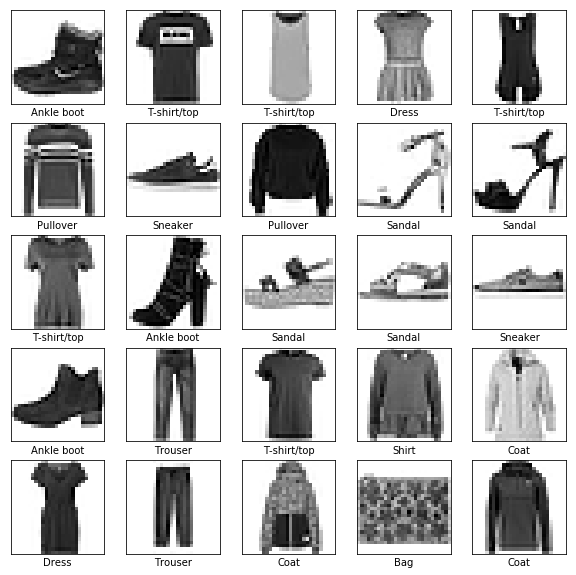

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build model

In [0]:




#from keras import backend as K
#model = keras.Sequential([
#    keras.layers.Flatten(input_shape=(28, 28)),
#    keras.layers.Dense(128, activation=tf.nn.relu),
#    keras.layers.Dense(10, activation=tf.nn.softmax)
#])

inputShape = (28, 28,1)

model = keras.Sequential()
chanDim = -1

# first CONV => RELU => CONV => RELU => POOL layer set
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", input_shape = inputShape))


model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization(axis=chanDim))
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same"))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.BatchNormalization(axis=chanDim))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
 
# second CONV => RELU => CONV => RELU => POOL layer set
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same"))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.BatchNormalization(axis=chanDim))
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same"))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.BatchNormalization(axis=chanDim))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

# softmax classifier
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation("softmax"))
 

		

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [0]:


train_images = train_images.reshape(-1,28, 28, 1)   #Reshape for CNN -  should work!!
test_images = test_images.reshape(-1,28, 28, 1)
#model.fit(train_images, train_labels, epochs=5)


H = model.fit(train_images, train_labels,
	validation_data=(test_images, test_labels),
	batch_size=32, epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 566s 9ms/sample - loss: 0.2133 - acc: 0.9227 - val_loss: 0.2108 - val_acc: 0.9257
Epoch 2/10
60000/60000 [==============================] - 560s 9ms/sample - loss: 0.2003 - acc: 0.9267 - val_loss: 0.1968 - val_acc: 0.9315
Epoch 3/10
60000/60000 [==============================] - 562s 9ms/sample - loss: 0.1879 - acc: 0.9308 - val_loss: 0.2061 - val_acc: 0.9239
Epoch 4/10
60000/60000 [==============================] - 562s 9ms/sample - loss: 0.1823 - acc: 0.9333 - val_loss: 0.2006 - val_acc: 0.9286
Epoch 5/10
60000/60000 [==============================] - 568s 9ms/sample - loss: 0.1692 - acc: 0.9390 - val_loss: 0.2163 - val_acc: 0.9263
Epoch 6/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.1649 - acc: 0.9397

# Test Accuracy

# we get a test accuracy of over 90%.

In [72]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 18s 2ms/sample - loss: 0.2943 - acc: 0.9144
Test accuracy: 0.9144


In [0]:
predictions = model.predict(test_images)

In [74]:
predictions[0]

array([6.6936572e-09, 4.3446357e-07, 4.1554968e-09, 5.8486183e-10,
       1.6173312e-08, 5.9670451e-06, 3.3731666e-09, 3.7495632e-04,
       2.9001207e-08, 9.9961853e-01], dtype=float32)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  img = img.reshape(28, 28)
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Visualize the predictions
Now we can use the trained model to make predictions / classifications on the test datasetmodel.predict(x_test) and visualize them. If you see the label as red, it means the prediction is not matching the true label; otherwise it’s blue.

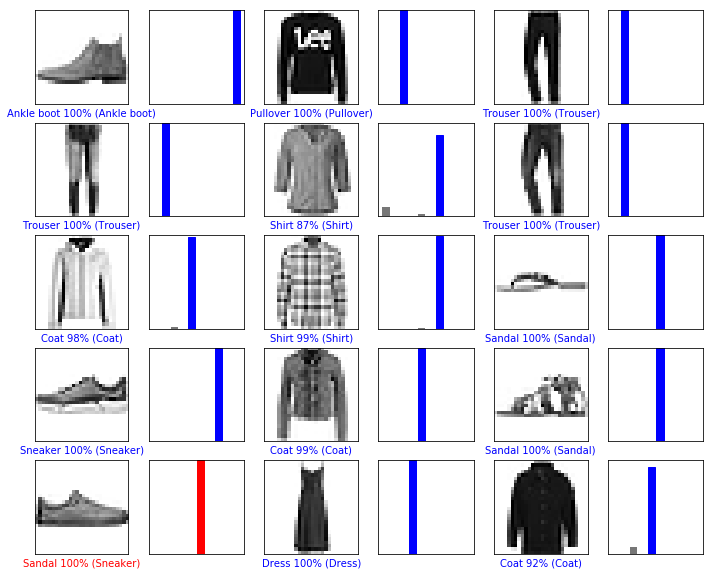

In [86]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

# Draw chart 

In [0]:
import matplotlib.pyplot as plt

# make predictions on the test set
preds = model.predict(testX)
 
# show a nicely formatted classification report
print("[INFO] evaluating network...")
#print(classification_report(test_labels.argmax(axis=1), predictions.argmax(axis=1),
#	target_names=labelNames))
 
# plot the training loss and accuracy
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")